In [10]:
import numpy as np
import pandas as pd
import yfinance as yf 
import ta

In [11]:
# Fetch data
ticker = "AAPL"  # Replace with your desired stock ticker
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Preview data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796021  72.856613  71.545387  71.799873  135480400
2020-01-03  72.088303  72.851769  71.862900  72.020439  146322800
2020-01-06  72.662697  72.701477  70.953987  71.206055  118387200
2020-01-07  72.320961  72.929306  72.100403  72.672394  108872000
2020-01-08  73.484352  73.787315  72.022858  72.022858  132079200


In [12]:
data['Close'] = data['Close'].astype(float)  # Ensure it's float

In [22]:
from ta.volatility import BollingerBands
from ta.trend import EMAIndicator

# Ensure 'Close' is a pandas Series and has no NaN values
close_prices = data['Close'].astype(float)

# Calculate Bollinger Bands
bb = BollingerBands(close=close_prices, window=20, window_dev=2)

# Debug: Inspect the shape of the raw attribute
print("Shape of _hband:", bb._hband.shape)



Shape of _hband: (756, 1)


In [32]:
from ta.volatility import BollingerBands

# Ensure 'Close' is a pandas Series and has no NaN values
close_prices = data['Close'].astype(float)

# Calculate Bollinger Bands
bb = BollingerBands(close=close_prices, window=20, window_dev=2)

# Use the internal attributes and flatten them
data['bb_high'] = pd.Series(bb._hband.squeeze(), index=data.index)  # Upper band
data['bb_low'] = pd.Series(bb._lband.squeeze(), index=data.index)   # Lower band
data['bb_middle'] = pd.Series(bb._mavg.squeeze(), index=data.index) # Middle band

# Preview the DataFrame
print(data[['Close', 'bb_high', 'bb_low', 'bb_middle']].head())

Price           Close bb_high bb_low bb_middle
Ticker           AAPL                         
Date                                          
2020-01-02  72.796021     NaN    NaN       NaN
2020-01-03  72.088303     NaN    NaN       NaN
2020-01-06  72.662697     NaN    NaN       NaN
2020-01-07  72.320961     NaN    NaN       NaN
2020-01-08  73.484352     NaN    NaN       NaN


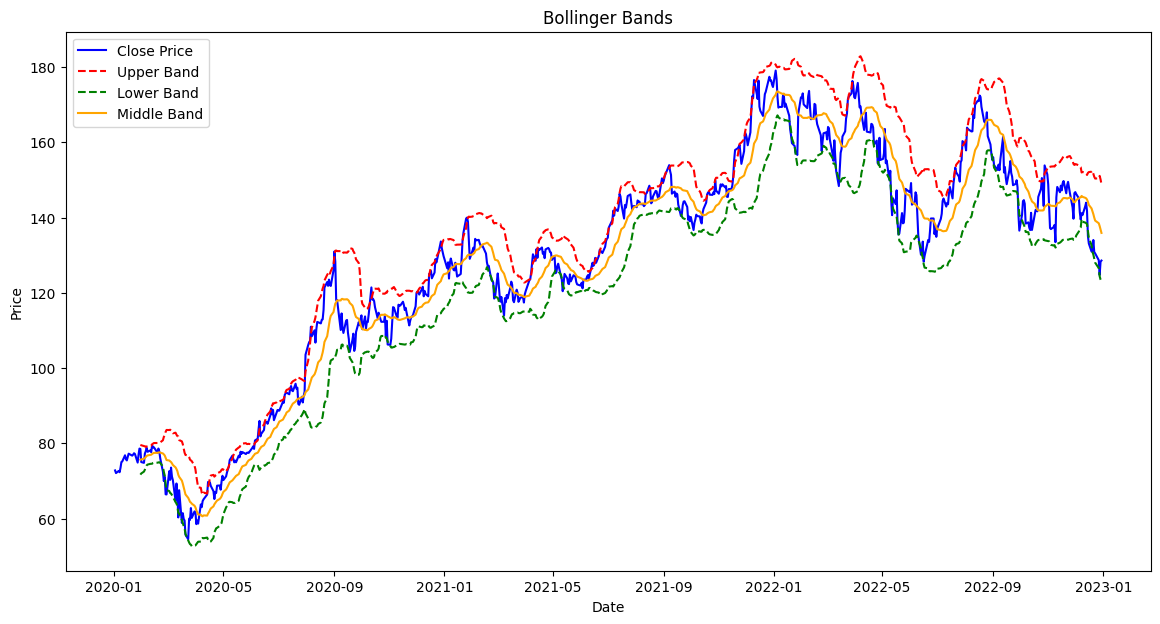

In [35]:
import matplotlib.pyplot as plt

# Plot Close prices and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['bb_high'], label='Upper Band', linestyle='--', color='red')
plt.plot(data.index, data['bb_low'], label='Lower Band', linestyle='--', color='green')
plt.plot(data.index, data['bb_middle'], label='Middle Band', linestyle='-', color='orange')

plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
